# Problem 1


Implementing the Imports

In [0]:
import matplotlib as mpl #importing matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt #import pyplot for plotting
import numpy as np #importing numpy
import tensorflow as tf #importing tensorflow
from tensorflow import keras #importing keras from tensorflow

Defining the function get_random_data

In [0]:
#a function to create random data
def get_random_data(w, b, mu, sigma, m): #defining the function
  labels = np.zeros(shape = (m, 1)) #creates an array of 0s with shape (m,1)
  labels[ :, 0] = np.random.choice([0, 1], size = (m, 1), p=[0.5, 0.5]).flatten() #turns the labels array into one dimension

  data = np.zeros(shape = (m, 2)) #creating the data array filled with 0s with shape of (m,2)
  data[:, 0] = np.random.uniform(size = (m, 1)).flatten() #turns the data array into one dimension

  n = np.random.normal(mu, sigma, (m,1)).flatten() #creates a normal distribution one dimension array
  data[:, 1] = w * data[:, 0] + b + np.power(-1, labels).flatten() * n #making the data arrray one dimension

  return data, labels #returns data and labels 1D array

Create the functions to display the generated data, along with the split data

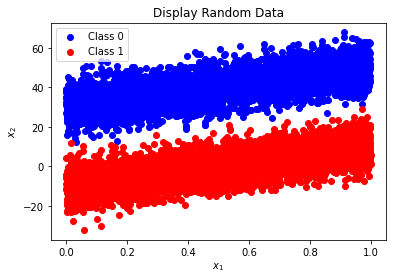

In [3]:
def display_random_data(data, labels, x, y, actual):
    rnd = labels.flatten() #making sure that labels are a 1D array

    zero_class = data[rnd == 0, :] #creating the class zero array
    plt.scatter(zero_class[:, 0], zero_class[:, 1], c = 'blue', label = 'Class 0') #plotting the class 0 data

    one_class = data[rnd == 1, :] #creating the class one array
    plt.scatter(one_class[:, 0], one_class[:, 1], c = 'red', label = 'Class 1') #plotting the class 1 data

    #setting up titles and labels on the graph
    plt.legend()
    plt.title('Display Random Data')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    if x is not None:
      plt.plot(x, y, c = 'green', label = 'True Line') #this plots the predicted line
      plt.plot(x, actual, c = 'yellow', label = 'Separating Line') #this plots the actual line
      plt.legend()

    plt.show()
    return

#creating a function that will split the data and labels, with %80 training and %20 testing
def data_split(data, labels):
  data_Labels = np.column_stack((data, labels))
  np.random.shuffle(data_Labels)

  n = data.shape[0]
  training_data, testing_data = np.split(data_Labels[:, :2], [int(n * 0.8)])
  training_label, testing_label = np.split(data_Labels[:, 2:], [int(n * 0.8)])

  return training_data, testing_data, training_label, testing_label

m = 10000 #by having more input, training will be more accurate
w = 20
b = 10
mu = 20
sigma = 6

data, labels = get_random_data(w, b, mu, sigma, m)
#display_random_data(data, labels)
display_random_data(data, labels, None, 0, 0)
train_data, test_data, train_labels, test_labels = data_split(data, labels) #splitting the data between training set and testing set

# Problem 2

Using TensorFlow backend.


Epoch 1/500
125/125 [==============================] - 0s 3ms/step - loss: 19.0068 - accuracy: 0.2348 - val_loss: 17.6861 - val_accuracy: 0.2320
Epoch 2/500
125/125 [==============================] - 0s 2ms/step - loss: 16.2669 - accuracy: 0.2262 - val_loss: 14.9481 - val_accuracy: 0.2230
Epoch 3/500
125/125 [==============================] - 0s 2ms/step - loss: 13.5455 - accuracy: 0.2135 - val_loss: 12.2202 - val_accuracy: 0.2125
Epoch 4/500
125/125 [==============================] - 0s 2ms/step - loss: 10.8254 - accuracy: 0.1931 - val_loss: 9.5010 - val_accuracy: 0.1880
Epoch 5/500
125/125 [==============================] - 0s 2ms/step - loss: 8.1274 - accuracy: 0.1619 - val_loss: 6.8073 - val_accuracy: 0.1440
Epoch 6/500
125/125 [==============================] - 0s 2ms/step - loss: 5.4702 - accuracy: 0.1026 - val_loss: 4.1677 - val_accuracy: 0.0620
Epoch 7/500
125/125 [==============================] - 0s 2ms/step - loss: 2.9274 - accuracy: 0.0195 - val_loss: 1.7634 - val_accuracy:

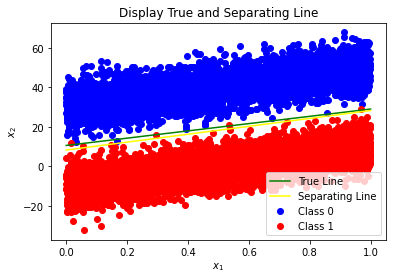

In [4]:
%tensorflow_version 2.x
from tensorflow import keras
from keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from keras.optimizers import SGD

#building the keras model
model = Sequential()
model.add(Dense(1, activation = 'sigmoid', input_shape = (2, )))

#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

epoch_count = 500
batch_count = 64
#training the model with high epoch in order to increase accuracy
model.fit(train_data, train_labels, epochs = epoch_count, batch_size = batch_count, validation_data = (test_data, test_labels))

#extracting weights
weights = model.get_weights()
print(weights)
x = np.linspace(0, 1, 100)
w1 = weights[0][0][0] #this is weight 1
w2 = weights[0][1][0] #this is weight 2
b = weights[1][0] #this is the bias
y = (-w1/w2) * x + (-b/w2) #this is the formula for calculating the true line
separating = w * x + b #this is the formula for calculating the separating line

#function to display data, true line and separating line
def display_true_and_separating_line(data, labels, x, y, actual):
  rnd = labels.flatten() #making sure that labels are a 1D array

  zero_class = data[rnd == 0, :] #creating the class zero array
  plt.scatter(zero_class[:, 0], zero_class[:, 1], c = 'blue', label = 'Class 0') #plotting the class 0 data

  one_class = data[rnd == 1, :] #creating the class one array
  plt.scatter(one_class[:, 0], one_class[:, 1], c = 'red', label = 'Class 1') #plotting the class 1 data

  #setting up titles and labels on the graph
  plt.legend()
  plt.title('Display True and Separating Line')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

  if x is not None:
    plt.plot(x, y, c = 'green', label = 'True Line') #this plots the predicted line
    plt.plot(x, actual, c = 'yellow', label = 'Separating Line') #this plots the actual line
    plt.legend()

  plt.show()
  return

display_true_and_separating_line(data, labels, x, y, separating)

Function for displaying a Heatmap, based on the Predictions

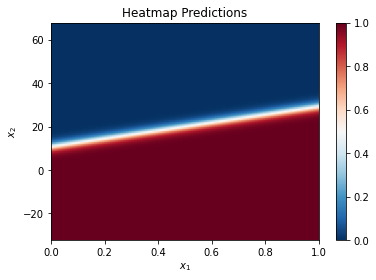

In [5]:
def display_heatmap(model, x_min, x_max, y_min, y_max, accuracy):
  #making the x and y axis to display a 2D plane
  x_axis = np.linspace(x_min, x_max, accuracy)
  y_axis = np.linspace(y_min, y_max, accuracy)
  X, Y, = np.meshgrid(x_axis,y_axis)

  #creating the Z axis
  X_flat = X.flatten()
  Y_flat = Y.flatten()
  Z = np.column_stack((X_flat, Y_flat))
  Z = model.predict(Z)
  Z = Z.reshape((accuracy, accuracy))

  #plotting within the parameters
  heat = plt.figure()
  ax = plt.axes()

  #adding color to the heatmap, with a legend
  im = ax.imshow(Z, extent = [x_min, x_max, y_min, y_max], origin = 'lower', cmap = 'RdBu_r', alpha = 1, aspect = 'auto')
  plt.colorbar(im, ax = ax)

  #labeling the heatmap
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.set_title("Heatmap Predictions")
  plt.show()
  return

#using the heatmap function 
y_min = min(data[:, 1])
y_max = max(data[:, 1])
accuracy = 100

display_heatmap(model, 0, 1, y_min, y_max, accuracy)

# Problem 3

Use numpy to implement a logistic regression function from scratch

Loss 0.39275916839563185, Accuracy 0.7529999999999725
Loss 0.38579228912773206, Accuracy 0.7619999999999715
Loss 0.37909440802456723, Accuracy 0.7694999999999707
Loss 0.37258550241814076, Accuracy 0.7759999999999699
Loss 0.36625778803448256, Accuracy 0.7799999999999695
Loss 0.36010546279792244, Accuracy 0.783999999999969
Loss 0.3541229558774924, Accuracy 0.7894999999999684
Loss 0.34830485199129124, Accuracy 0.7959999999999677
Loss 0.34264588818480046, Accuracy 0.8059999999999666
Loss 0.3371409533295422, Accuracy 0.8104999999999661
Loss 0.3317850872577071, Accuracy 0.8174999999999654
Loss 0.32657347945079707, Accuracy 0.8249999999999645
Loss 0.3215014673319275, Accuracy 0.8334999999999636
Loss 0.3165645342135215, Accuracy 0.8359999999999633
Loss 0.3117583069484396, Accuracy 0.8414999999999627
Loss 0.30707855332871464, Accuracy 0.8499999999999618
Loss 0.3025211792723011, Accuracy 0.8549999999999612
Loss 0.2980822258346518, Accuracy 0.8609999999999606
Loss 0.2937578660785009, Accuracy 0.8

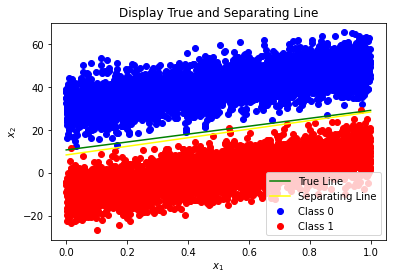

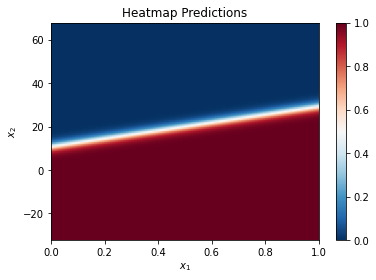

In [6]:
def logistic_regression(train_data, test_data, train_labels, test_labels, epochs, lr):
  train_x = np.column_stack((np.ones((np.array(train_data).shape[0], 1)), np.array(train_data))) #formatting the training data
  train_y = np.array(train_labels) #formatting the training labels

  test_x = np.column_stack((np.ones((np.array(test_data).shape[0], 1)), np.array(test_data))) #formatting the testing data
  test_y = np.array(test_labels) #formatting the testing labels

  new_weights = np.zeros((train_x.shape[1], 1)) #creating an array to hold the new weights

  #calculating the loss and accuracy for each epoch, then outputting it
  for epoch in range(epochs):
    loss = 0
    m = train_x.shape[0]
    shuffled_indicies = np.random.permutation(m)

    #this impliments the sigmoid function
    for i, (data, labels) in enumerate(zip(train_x, train_y)):
      z = data.dot(new_weights)
      sigmoid = 1 / (1 + np.exp(-z))

      gradient = (1 / m) * np.array([(sigmoid - labels) * data]).T
      new_weights -= (gradient * lr)

    z = test_x.dot(new_weights)
    sigmoid = 1 / (1 + np.exp(-z))
    test_size = test_y.shape[0]

    #calculating the loss
    loss = ((-test_y * np.log(sigmoid) - ((1 - test_y) * np.log(1 - sigmoid)))).sum()
    loss *= (1 / test_size)

    accuracy = 0
    for predict, actual in zip(sigmoid, test_y):
      predicted = np.rint(predict)
      if predicted == actual:
        accuracy += (1 / test_size)
    print("Loss {}, Accuracy {}".format(loss, accuracy))
  
  display_true_and_separating_line(train_data, train_labels, x, y, separating)

  return new_weights

lr = 0.1
logistic_regression(train_data, test_data, train_labels, test_labels, epoch_count, lr)
display_heatmap(model, 0, 1, y_min, y_max, accuracy)

# Sources
https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb
https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac